In [43]:
import pandas    as pd
import missingno as msno

# ETL: National Olympic Committees (NOCs)

In [44]:
# import countries competing in Olympics
regions = pd.read_csv("../dat/01_noc_regions.csv")

# drop extraneous country columns
regions = regions.drop(['notes'], axis=1)

# show Olympic countries
print(regions.shape)
regions.head()

(230, 2)


,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


# ETL: Host Cities of the Olympic Games

In [45]:
# print host country committees
hosts = pd.read_csv("../dat/02_host_cities.csv")
print(hosts.shape)
hosts

(42, 2)


,Host City,Host Country
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN
5,Albertville,FRA
6,Lillehammer,NOR
7,Los Angeles,USA
8,Salt Lake City,USA
9,Helsinki,FIN


# ETL: Olympic Athletes & Events

In [48]:
# import list of athletes competing in events
games = pd.read_csv("../dat/03_athlete_events.csv")

# merge host countries
games = games.merge(hosts, left_on='City', right_on='Host City')
games = games.sort_values(by = ['Games','NOC'])

# show athletes and events
print(games.shape)
games.head()

(271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Host City,Host Country
159033,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN,Athina,GRE
159034,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia/Great Britain,AUS,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,Bronze,Athina,GRE
159035,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,Gold,Athina,GRE
159036,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Athina,GRE
159037,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,Athina,GRE


In [49]:
print(len(games['Host Country'].unique()))
games['Host Country'].unique()

24


array(['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'BEL', 'NED', 'SUI', 'GER',
       'GDR', 'FIN', 'NOR', 'AUS', 'ITA', 'JPN', 'MEX', 'CAN', 'URS',
       'YUG', 'KOR', 'ESP', 'CHN', 'RUS', 'BRA'], dtype=object)

In [50]:
print(len(games['NOC'].unique()))
games['NOC'].unique()

230


array(['AUS', 'AUT', 'DEN', 'FRA', 'GBR', 'GER', 'GRE', 'HUN', 'ITA',
       'SUI', 'SWE', 'USA', 'ARG', 'BEL', 'BOH', 'BRA', 'CAN', 'COL',
       'CUB', 'ESP', 'HAI', 'IND', 'IRI', 'LUX', 'MEX', 'NED', 'NOR',
       'NZL', 'PER', 'ROU', 'RUS', 'NFL', 'RSA', 'CRT', 'EGY', 'FIN',
       'TUR', 'ANZ', 'ISL', 'CHI', 'JPN', 'POL', 'POR', 'SRB', 'UNK',
       'EST', 'MON', 'TCH', 'YUG', 'BUL', 'ECU', 'IRL', 'LAT', 'LTU',
       'PHI', 'URU', 'NEP', 'MLT', 'PAN', 'ZIM', 'CHN', 'ESA', 'GUA',
       'VEN', 'AFG', 'BER', 'BOL', 'CRC', 'LIE', 'GUY', 'IRQ', 'JAM',
       'KOR', 'LIB', 'MYA', 'PAK', 'PUR', 'SGP', 'SRI', 'SYR', 'TTO',
       'AHO', 'BAH', 'GHA', 'HKG', 'INA', 'ISR', 'NGR', 'SAA', 'THA',
       'URS', 'VNM', 'CAM', 'ETH', 'FIJ', 'KEN', 'LBR', 'MAL', 'NBO',
       'TPE', 'UGA', 'MAR', 'RHO', 'SMR', 'SUD', 'TUN', 'UAR', 'WIF',
       'ALG', 'CGO', 'CHA', 'CIV', 'CMR', 'DOM', 'MAD', 'MAS', 'MGL',
       'MLI', 'NIG', 'SEN', 'TAN', 'ZAM', 'PRK', 'BAR', 'BIZ', 'CAF',
       'COD', 'FRG',

In [51]:
print(len(games['Games'].unique()))
games['Games'].unique()

51


array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [52]:
print(len(games['Sport'].unique()))
games['Sport'].unique()

66


array(['Tennis', 'Athletics', 'Swimming', 'Cycling', 'Fencing',
       'Weightlifting', 'Gymnastics', 'Shooting', 'Wrestling',
       'Equestrianism', 'Rowing', 'Water Polo', 'Football', 'Archery',
       'Tug-Of-War', 'Basque Pelota', 'Rugby', 'Sailing', 'Cricket',
       'Croquet', 'Polo', 'Golf', 'Lacrosse', 'Diving', 'Boxing', 'Roque',
       'Figure Skating', 'Hockey', 'Motorboating', 'Racquets',
       'Jeu De Paume', 'Modern Pentathlon', 'Art Competitions',
       'Ice Hockey', 'Alpinism', 'Speed Skating', 'Bobsleigh',
       'Military Ski Patrol', 'Cross Country Skiing', 'Nordic Combined',
       'Ski Jumping', 'Curling', 'Skeleton', 'Handball', 'Canoeing',
       'Basketball', 'Aeronautics', 'Alpine Skiing', 'Biathlon', 'Judo',
       'Volleyball', 'Luge', 'Synchronized Swimming',
       'Rhythmic Gymnastics', 'Table Tennis', 'Badminton', 'Baseball',
       'Freestyle Skiing', 'Short Track Speed Skating',
       'Beach Volleyball', 'Softball', 'Snowboarding', 'Triathlon',
    

In [53]:
print(len(games['Medal'].unique()))
games['Medal'].unique()

4


array([nan, 'Bronze', 'Gold', 'Silver'], dtype=object)

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Host City            0
Host Country         0
dtype: int64


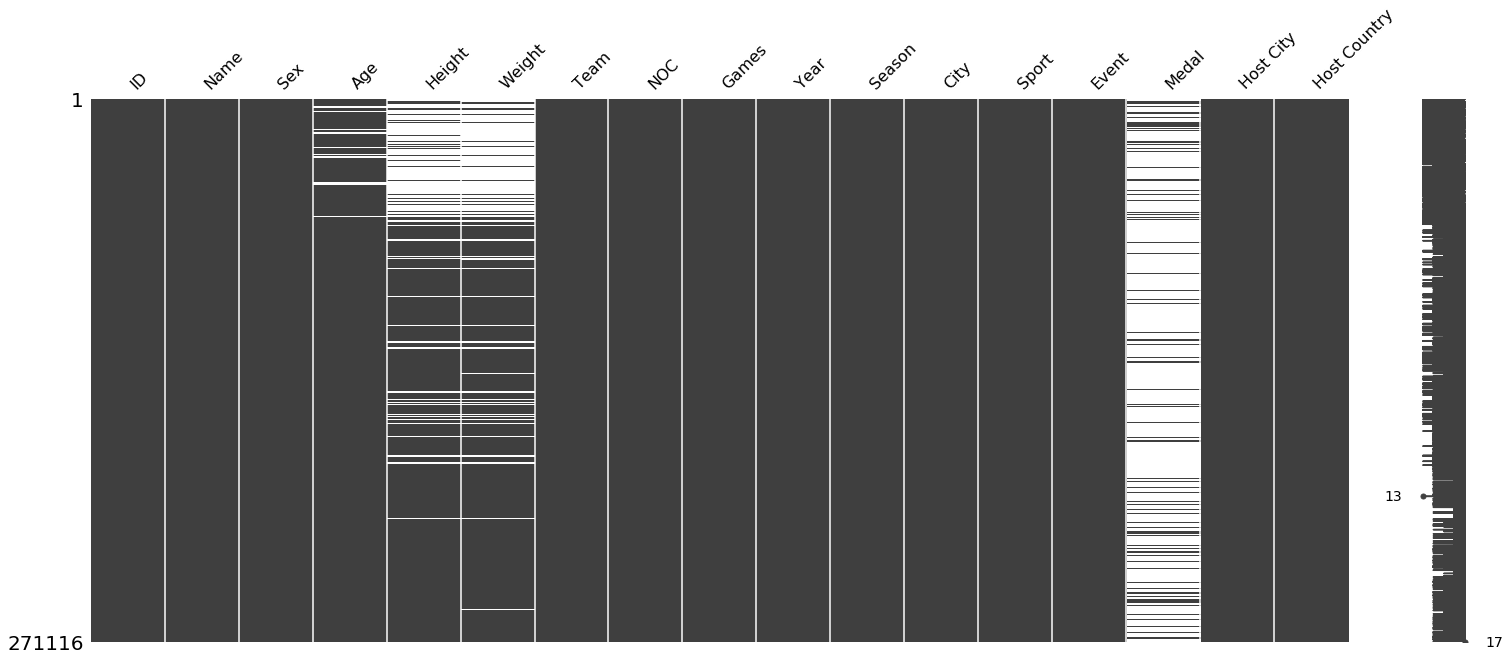

In [54]:
# check games for null values
print(games.isnull().sum())

# visualize null values
msno.matrix(games)

In [55]:
# drop extraneous athlete and event columns
games = games.drop(['ID','Age','Height','Weight','Team','City','Host City'], axis = 1)
games.head()

,Name,Sex,NOC,Games,Year,Season,Sport,Event,Medal,Host Country
159033,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Singles,NaN,GRE
159034,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Doubles,Bronze,GRE
159035,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's 800 metres,Gold,GRE
159036,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,"Athletics Men's 1,500 metres",Gold,GRE
159037,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's Marathon,NaN,GRE


Name                 0
Sex                  0
NOC                  0
Games                0
Year                 0
Season               0
Sport                0
Event                0
Medal           231333
Host Country         0
dtype: int64


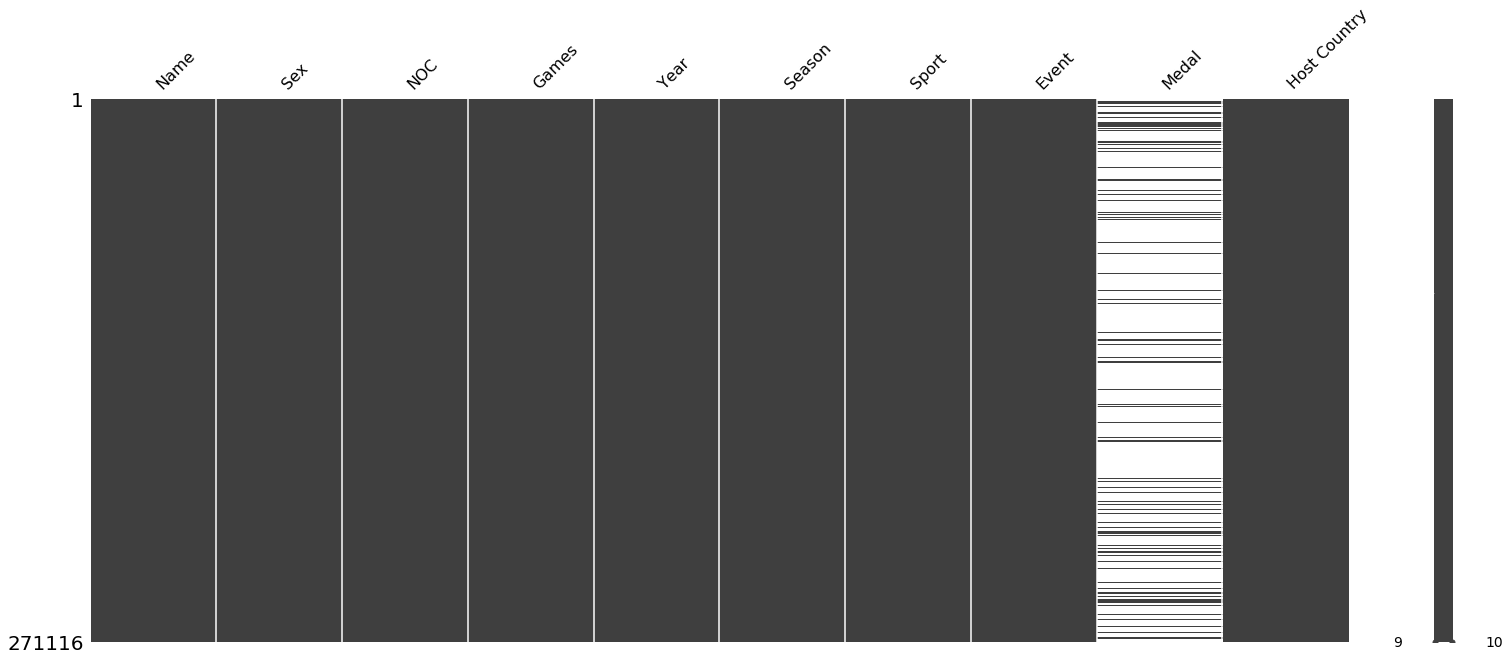

In [56]:
# check games for null values
print(games.isnull().sum())

# visualize null values
msno.matrix(games)

# ETL: Pickle DataFrames

In [57]:
# save dataframe
games.to_pickle('../dat/games.pkl')